## 特征工程&数据建模

<div class="alert alert-block alert-danger"><b>Tip: </b>
    
- 完成【第四阶段】之前，请先run前面所有的代码！
- 图片若显示不出，需要连一下vpn，图片存储在github中了。

</div>

<div class="alert alert-block alert-warning">
<center><b>【第四阶段】项目日志（2022年3月7日）</b></center>
    
   
**第四节阶段核心目的：**基于上阶段处理过的数据`train_balanced_update`和`final_meta`进行特征工程（Feature Engineering）并且根据树形算法筛选特征，并代入XGBosst进行概率预测。
   
    
**难度（最高5星）：**⭐⭐⭐
    
**第三阶段周期：** 2022年3月1日 至 2022年3月9日（北京时间）


Good Luck!
</div>

小伙伴们，终于进入到鲸析数据科学项目第一期的最终阶段了，坚持就是胜利！

前三个阶段，我们关于train进行的元数据处理、分析并且对于不平衡类别数据进行了转换，也基于元数据，对不同的变量类型的特征加以深入的数据分析，并且学习了类别型变量的编码方法。

那么这里，我们要对train和test同时做编码处理，在特征工程的过程中，我们要保证train和test的维度是保持一致的，所以特征工程是可以同时对train和test做的，下面我们来一步一步看一下！

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel

In [6]:
#balanced target, imputed missing value, target encoded 
train = pd.read_csv('./data/train_balanced_update.csv',index_col=0,dtype={'id': np.int32, 'target': np.int8})

In [7]:
#imputed missing value, target encoded 
test = pd.read_csv('./data/test_update.csv',index_col=0,dtype={'id': np.int32})

In [4]:
test

,id,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,ps_car_11_cat_tar_enc
0,0,0,1.0,8,1.0,0.0,0,1,0,0,...,1,1,12,0,1,1,0,0,1,0.127264
1,1,4,1.0,5,1.0,0.0,0,0,0,1,...,0,3,10,0,0,1,1,0,1,0.115163
2,2,5,1.0,3,0.0,4.0,0,0,0,1,...,0,2,4,0,0,0,0,0,0,0.151845
3,3,0,1.0,6,0.0,0.0,1,0,0,0,...,1,0,5,1,0,1,0,0,0,0.140782
4,4,5,2.0,7,1.0,0.0,0,0,0,1,...,0,0,4,0,1,1,0,0,1,0.158020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892811,1488022,0,NaN,6,NaN,NaN,0,1,0,0,...,2,3,4,0,1,0,0,1,0,0.229916
892812,1488023,5,NaN,5,NaN,NaN,0,0,1,0,...,2,2,11,0,0,1,1,0,0,0.158203
892813,1488024,0,NaN,5,NaN,NaN,1,0,0,0,...,2,2,11,0,1,1,0,0,0,0.181998
892814,1488025,6,NaN,5,NaN,NaN,0,0,0,1,...,1,2,7,1,1,0,0,0,0,0.173717


In [15]:
# test.drop('target',axis=1,inplace=True)

In [6]:
full_set = pd.concat([train,test],ignore_index=True)

In [7]:
full_set

,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,...,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,ps_car_11_cat_tar_enc
0,0.0,2,1,9,1,0,0,0,1,0,...,1,2,8,0,0,1,0,0,0,0.179269
1,0.0,1,1,2,1,0,0,1,0,0,...,4,4,9,1,1,1,1,1,0,0.192935
2,0.0,7,1,6,0,4,0,0,0,1,...,1,3,7,0,1,1,0,0,0,0.105982
3,0.0,1,1,3,0,0,1,0,0,0,...,0,2,9,0,0,1,0,0,0,0.178073
4,0.0,6,2,7,1,0,0,1,0,0,...,0,2,9,0,0,1,1,0,1,0.128564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037437,NaN,0,1,6,0,0,0,1,0,0,...,2,3,4,0,1,0,0,1,0,NaN
1037438,NaN,5,3,5,1,0,0,0,1,0,...,2,2,11,0,0,1,1,0,0,NaN
1037439,NaN,0,1,5,0,0,1,0,0,0,...,2,2,11,0,1,1,0,0,0,NaN
1037440,NaN,6,1,5,1,0,0,0,0,1,...,1,2,7,1,1,0,0,0,0,NaN


In [17]:
final_meta = pd.read_csv('./data/final_meta.csv',index_col=0)

In [50]:
final_meta

,Role,Level,data_type,Keep,Unique_values,Count_Missing_values,Missing Value Impute
Variable Name,,,,,,,
id,id,nominal,int64,False,Not Applicable,0(0.0%),No Missing Value
target,target,binary,int64,True,2,0(0.0%),No Missing Value
ps_ind_01,feature,ordinal,int64,True,8,0(0.0%),No Missing Value
ps_ind_02_cat,feature,nominal,int64,True,5,80(0.01%),Keep Missing Value
ps_ind_03,feature,ordinal,int64,True,12,0(0.0%),No Missing Value
ps_ind_04_cat,feature,nominal,int64,True,3,48(0.01%),Keep Missing Value
ps_ind_05_cat,feature,nominal,int64,True,8,1604(0.27%),Keep Missing Value
ps_ind_06_bin,feature,binary,int64,True,2,0(0.0%),No Missing Value
ps_ind_07_bin,feature,binary,int64,True,2,0(0.0%),No Missing Value


根据之前保存的final_meta找出所有保存的连续型变量。

In [18]:
final_meta[(final_meta.Level == 'interval')|(final_meta.Level == 'ratio') & (final_meta.Keep == True)]

,Role,Level,data_type,Keep,Unique_values,Count_Missing_values,Missing Value Impute
Variable Name,,,,,,,
ps_reg_01,feature,ratio,float64,True,Not Applicable,0(0.0%),No Missing Value
ps_reg_02,feature,interval,float64,True,Not Applicable,0(0.0%),No Missing Value
ps_reg_03,feature,interval,float64,True,Not Applicable,0(0.0%),Imputed
ps_car_12,feature,interval,float64,True,Not Applicable,0(0.0%),Imputed
ps_car_13,feature,interval,float64,True,Not Applicable,0(0.0%),No Missing Value
ps_car_14,feature,interval,float64,True,Not Applicable,0(0.0%),Imputed
ps_car_15,feature,interval,float64,True,Not Applicable,0(0.0%),No Missing Value
ps_calc_01,feature,ratio,float64,True,Not Applicable,0(0.0%),No Missing Value
ps_calc_02,feature,ratio,float64,True,Not Applicable,0(0.0%),No Missing Value


In [22]:
continuous_cols = final_meta[(final_meta.Level == 'interval')|(final_meta.Level == 'ratio') & (final_meta.Keep == True)].index.tolist()
continuous_cols

['ps_reg_01',
 'ps_reg_02',
 'ps_reg_03',
 'ps_car_12',
 'ps_car_13',
 'ps_car_14',
 'ps_car_15',
 'ps_calc_01',
 'ps_calc_02',
 'ps_calc_03']

In [47]:
# 计算各特征的相关系数矩阵（对称）
corr_mat = full_set[continuous_cols].corr()

In [48]:
corr_mat

,ps_reg_01,ps_reg_02,ps_reg_03,ps_car_12,ps_car_13,ps_car_14,ps_car_15,ps_calc_01,ps_calc_02,ps_calc_03
ps_reg_01,1.000000,0.470147,0.637574,0.016610,0.025570,0.010842,0.002545,-0.001181,0.001975,-0.001962
ps_reg_02,0.470147,1.000000,0.516606,0.169263,0.193877,0.003510,0.055176,0.000250,-0.000001,-0.000211
ps_reg_03,0.637574,0.516606,1.000000,0.081632,0.099140,0.004421,0.023329,-0.000770,0.001582,-0.000216
ps_car_12,0.016610,0.169263,0.081632,1.000000,0.672691,0.013221,0.049876,-0.000729,0.000185,0.000279
ps_car_13,0.025570,0.193877,0.099140,0.672691,1.000000,-0.035437,0.528719,0.000164,0.000290,0.000931
ps_car_14,0.010842,0.003510,0.004421,0.013221,-0.035437,1.000000,-0.030894,-0.000958,0.000269,0.001185
ps_car_15,0.002545,0.055176,0.023329,0.049876,0.528719,-0.030894,1.000000,0.000690,0.000003,0.000765
ps_calc_01,-0.001181,0.000250,-0.000770,-0.000729,0.000164,-0.000958,0.000690,1.000000,-0.001436,0.000204
ps_calc_02,0.001975,-0.000001,0.001582,0.000185,0.000290,0.000269,0.000003,-0.001436,1.000000,0.001050
ps_calc_03,-0.001962,-0.000211,-0.000216,0.000279,0.000931,0.001185,0.000765,0.000204,0.001050,1.000000


heatmap热力图正好作用于相关系数矩阵，可以帮我们更直观地观测总结各连续型特征之间的相关性强弱。

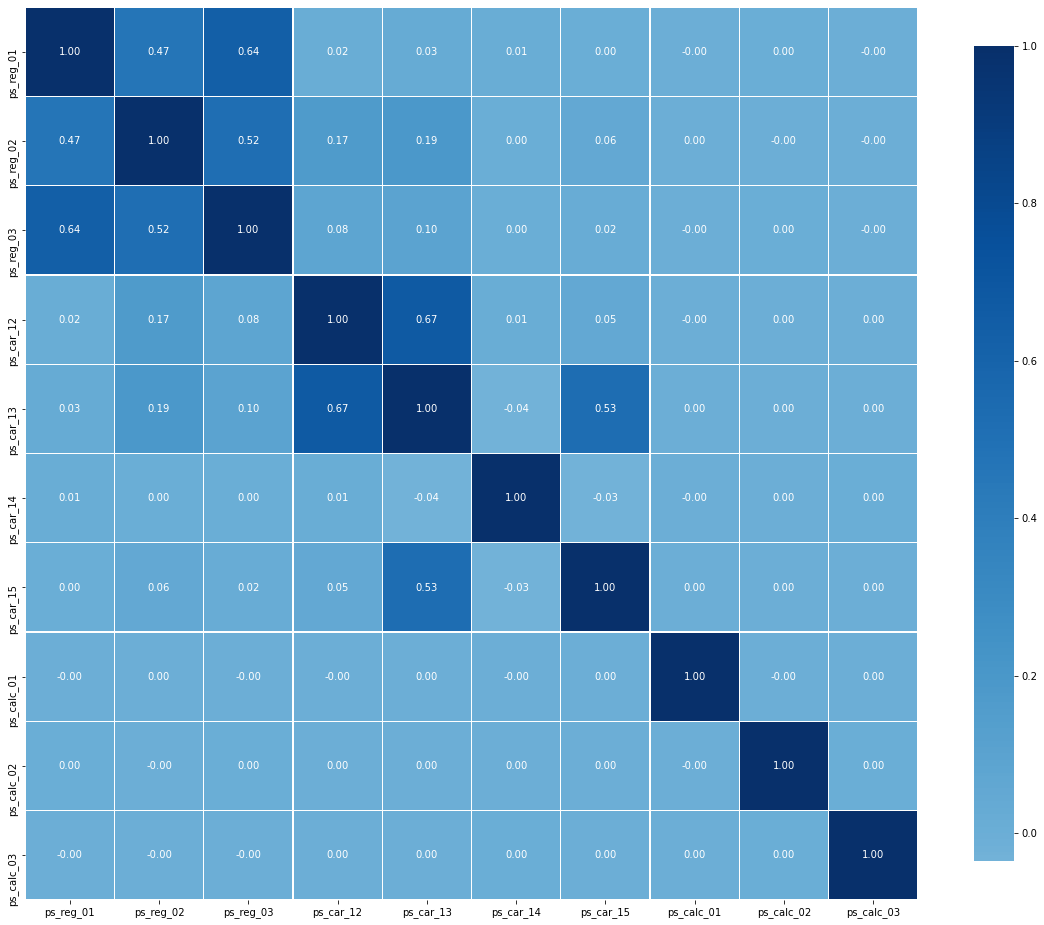

In [49]:
plt.figure(figsize = [20,20])   # 设置画布大小
sns.heatmap(data = corr_mat,    # 
            vmax=1,
            center=0,
            square=True,
           annot = True,  # 显示文字
          fmt='.2f',      # 保留两位
           cmap = 'Blues',   # 颜色
           linewidths = 0.3,  # 分割线宽度
           cbar_kws={"shrink": .75});

颜色越深表示2者相关性越强！注意：忽略掉对角线全是1的这一部分，因为，每个特征和自身的相关系数是1。

可以发现，下面这些连续型变量的相关程度较高：

- ps_reg_02 和 ps_reg_03 (0.75)
- ps_car_13 和 ps_car_12 ps_car_14 ps_car_15 都很相关！
- ps_car_11_cat_tar_enc 和 ps_car_12 ps_car_13 ps_car_14 ps_car_15相关度也不低

<div class="alert alert-block alert-success"><b>Step 1</b>: 
    
所以现在该怎么办呢？有些变量之间是存在较强的相关性的，是需要对这种情况如何处理呢？

大家有什么好思路么？（2分）
    
</div>

鉴于变量之间的较强相关性，我不能把他们都带入模型中，因为相关特征不能提升模型表现，对于：

1. 线性模型

会出现多重共线性的问题，从而导致解析解的波动较大，方差较大，不稳定。

2. 树形模型

树形模型基于各特征的信息增益对其分割，适合处理不同特征之间的交互性，但是高相关性会掩盖其中的【交互性】。

<div class="alert alert-block alert-success"><b>Step 2</b>: 
    
查查资料，简述特征的相关性和交互性的区别是什么？（2分）
    
</div>

- Feature correlation

特征的相关性是说，不考虑target，两个特征之间是互相依赖的，或者说，如果我增大特征A的值，特征B的值也会发生线性的变化（变大或者变小）。

- Feature Interaction

特征交互性是说，现在有两个不相关的特征，比如：房子大小（特征A）和房子的位置（特征B），他们并不相关，我们的target是房价（要去预测的），那么这俩特征交互起来，或者说以某种方式合并起来，是不是会有`1+1>2`的效果，比如基本的【加减乘除】的组合。

所以总结起来：


|          |                    interaction 交互性                    |                      correlation 相关性                      |
| :------: | :------------------------------------------------------: | :----------------------------------------------------------: |
| 研究目的 |   判断是否有特征组合的可能（特征组合、加强）<br />降维   |   判断是否有强相关特征，使模型过拟合（特征筛选）<br />降维   |
|   难点   | 不好判断交互度，构造方法多样，比如：经验驱动、数据驱动。 | 相关性虽然易于判断，但是强相关特征如何筛选，如何降维也比较困难。 |
| 作用变量 |                          连续型                          |                            连续型                            |
| 分析手段 |                           SHAP                           |                    VarianceThreshold/PCA                     |

In [58]:
train_balanced_update = pd.read_csv('./data/train_balanced_update.csv')
train_balanced_update.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin,ps_car_11_cat_tar_enc
0,744529,0,2,1,9,1,0,0,0,1,...,1,2,8,0,0,1,0,0,0,0.180515
1,673907,0,1,1,2,1,0,0,1,0,...,4,4,9,1,1,1,1,1,0,0.198305
2,730796,0,7,1,6,0,4,0,0,0,...,1,3,7,0,1,1,0,0,0,0.105386
3,306142,0,1,1,3,0,0,1,0,0,...,0,2,9,0,0,1,0,0,0,0.180477
4,1102701,0,6,2,7,1,0,0,1,0,...,0,2,9,0,0,1,1,0,1,0.125739


In [59]:
train_balanced_update['ps_reg_03'].value_counts()

0.633936    25401
0.602599      166
0.596343      162
0.704894      158
0.664737      157
            ...  
1.862122        1
2.064280        1
1.677982        1
1.829788        1
1.971674        1
Name: ps_reg_03, Length: 4730, dtype: int64

看一下分布！

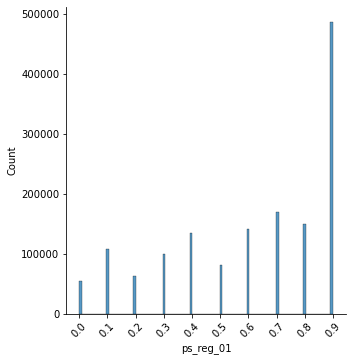

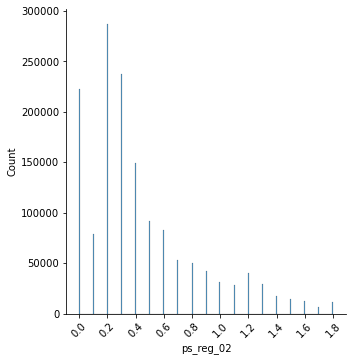

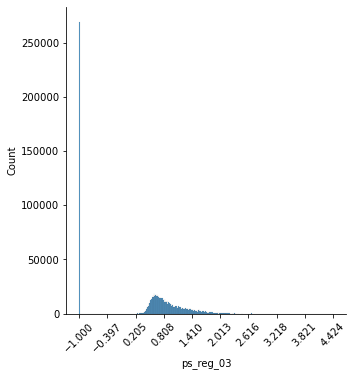

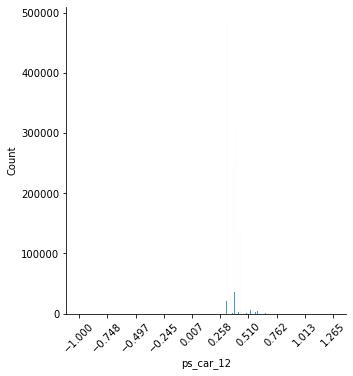

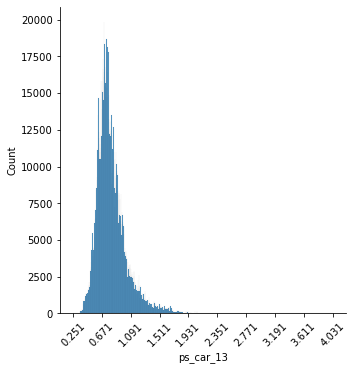

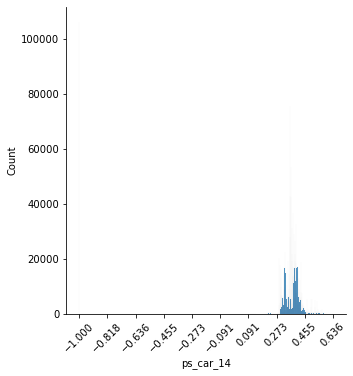

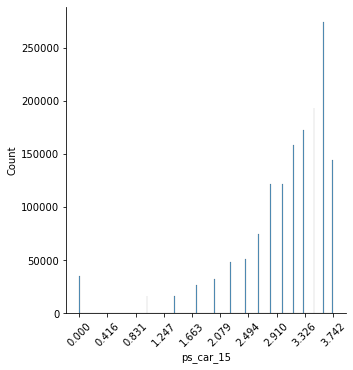

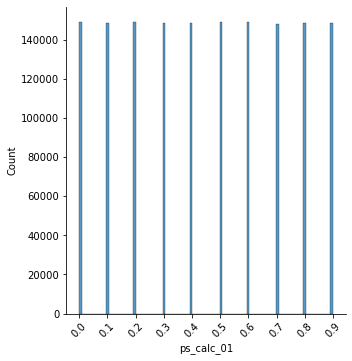

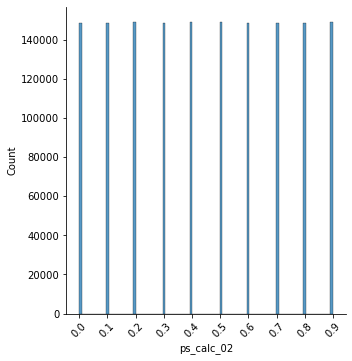

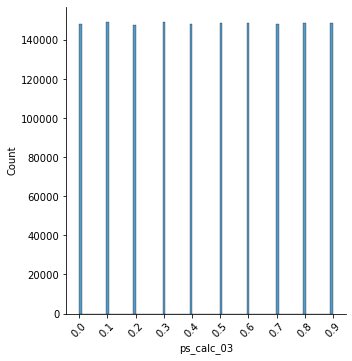

In [60]:
for col in continuous_cols:
    sns.displot(full_set[col])
    plt.xticks(ticks = np.linspace(start = full_set[col].min(),
                                  stop = full_set[col].max(),
                                  num = 10),rotation = 45)

感觉有一些变量虽然是连续型的，但是并不是会形成传统意义上的概率分布，还会有离散型数据的性质出现，并且有很多尖峰的情况，普遍对应着肥尾。

所以我们尝试采用特征离散化，来强化突出特征的关键性信息（主要集中在尖峰附近），并简化特征，避免过拟合。

同时避免丢失离群值（离群值无法定义为异常值，并不是分布的异常就说明其不合理性，在此没有更多的evidence证明，所以不剔除离群值）

### 特征分箱


#### 分箱算法简介

先来讲讲什么是分箱算法，根据字面意思就是

把数据按照不同的【规则】分到不同的【箱子】里。

其实分箱是特征工程的一种，可以理解为一种**连续数据**变为**离散数据**的建模方式。

 

> 举例：比如有一组连续数据，比如为`25，14，68，43，63`。假设数据的分箱逻辑是大于50为0，小于50为1，那么最终数据会变成1，1，0，1，0，数据就离散化了。当然分箱有很多方式，大致作用就是把连续数据按照一定的规则离散化。

 

#### 分箱算法的好处
 
其优点等同于数据离散化的好处：

- 减少过拟合的风险，因为分箱相当于对于数据去粗粒度描述

- 增加稀疏数据的概率，减少计算量，因为0的数据变多了

- 减少噪声数据的影响，比如一组数据按照0~100均匀分布，当数据中突然出现一个10000的数据，如果不做分箱的化会对Logistic Regression这种模型的训练造成很大影响

- 方便特征衍生，因为数据离散化后就可以把特征直接相互做内积提升特征维度

- 离散化后可以提升模型的鲁棒性，比如我们有一组数据是年龄，比如A30岁、B50岁，到了第二年A变成31岁，B变成51岁，所有数据都变了理论上要更新模型。但是如果数据分箱了之后，比如分箱逻辑是小于40岁为0，大于40岁为1，则第一年和第二年数据没有变化，模型也不用变


<div class="alert alert-block alert-success"><b>Step 3</b>: 
    
- 根据上图，请研究思考哪些连续型变量需要尝试进行【特征分箱】的操作？
- 请叙述 pd.qcut 和 pd.cut 的区别，我们在变量离散化时用哪个更好？
    
</div>

![](https://github.com/datoujinggzj/Whale_Project/blob/main/porto-seguro-safe-driver-prediction/pic/phase4/woe_computation.png?raw=true)

In [ ]:
def woe_iv_encoding(data, feat, target, max_intervals, verbose = False):
    
    feat_bins = pd.qcut(x = data[feat], q = max_intervals, duplicates='drop')
    gi = pd.crosstab(feat_bins,data[target])
    gb = pd.Series(data=data[target]).value_counts()

    bad = gi[1]/gi[0]
    good = gb[1]/gb[0]

    # 计算woe
    woe = np.log(bad) - np.log(good)

    # 计算iv
    iv = (bad-good)*woe

    # 计算整个特征的iv
    f_iv = iv.sum()  # 5.2958917587905745
    if verbose == True:
        print(f"根据当前的间隔数{max_intervals}，特征{feat}所计算的总information value为：{f_iv}")
        print('='*80)

    # 进行映射操作
    dic = iv.to_dict()

    iv_bins = feat_bins.map(dic)  # 连续型变量离散化

    return iv_bins.astype('float64')

![](https://github.com/datoujinggzj/Whale_Project/blob/main/porto-seguro-safe-driver-prediction/pic/phase4/woe_iv.png?raw=true)

In [ ]:
continuous_col_bin = ['ps_reg_01','ps_car_12','ps_car_13','ps_car_14']    # 填写


for col in continuous_col_bin:
    full_set[f"{col}_bin_woe"] = woe_iv_encoding(data = full_set, feat = col, target = 'target', max_intervals = 20)
    sns.displot(full_set[f"{col}_bin_woe"])

### 特征交互

<div class="alert alert-block alert-success"><b>Step 4</b>: 
    
- 简述【特征交互】的意义和原理
- 请叙述 PolynomialFeatures 的 degree interaction_only include_bias的含义
    
</div>

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

interactions = pd.DataFrame(data=poly.fit_transform(full_set[continuous_cols]), 
                            columns=poly.get_feature_names_out(continuous_cols))


interactions.drop(continuous_cols, axis=1, inplace=True)  # Remove the original columns
# Concat the interaction variables to the train data
print('特征交互前，训练集有 {}个变量 '.format(full_set.shape[1]))
full_set = pd.concat([full_set, interactions], axis=1)
print('特征交互后，训练集有 {}个变量'.format(full_set.shape[1]))

In [ ]:
nominal_cols = final_meta[(final_meta.变量类型 == 'nominal') & (final_meta.是否保留 == True)].index.tolist()

### 特征筛选

<div class="alert alert-block alert-success"><b>Step 5</b>: 
    
- 为什么要去除variance较低的特征？
    
</div>

In [ ]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=.01)
selector.fit(full_set.drop(['id', 'target'], axis=1)) # Fit to train without id and target variables

f = np.vectorize(lambda x : not x) # Function to toggle boolean array elements

v = full_set.drop(['id', 'target'], axis=1).columns[f(selector.get_support())]
print('{} variables have too low variance.'.format(len(v)))
print('These variables are {}'.format(list(v)))

<div class="alert alert-block alert-success"><b>Step 6</b>: 
    
- 'weight', 'gain', 'cover' 这三种衡量特征重要度的strategy区别是什么？
- 了解树形算法的基本概念:
    - https://statquest.org/xgboost-part-1-xgboost-trees-for-regression/
    - https://statquest.org/xgboost-part-2-xgboost-trees-for-classification/
    
</div>

In [ ]:
from xgboost import XGBClassifier
from xgboost import plot_importance



plt.figure(figsize = [100,20])

X = full_set.loc[train.index].drop(['id', 'target'], axis=1)
y = full_set.loc[train.index].target

model = XGBClassifier()

model.fit(X, y)
# plot feature importance

In [ ]:
# define subplot grid
fig, axs = plt.subplots(nrows=5, ncols=1, figsize=(15, 80))
plt.tight_layout()
plt.subplots_adjust(hspace=0.1)

types = ['weight', 'gain', 'cover', 'total_gain', 'total_cover']
# loop through tickers and axes
colors = ['#ff7f01','#08aebd','#fc5531','#139948','#8950fe']
for ty, ax, color in zip(types, axs.ravel(), colors):
    # filter df for ticker and plot on specified axes
    plot_importance(ax = ax, booster = model,importance_type=ty, color = color)

    # chart formatting
    ax.set_title(ty.upper(),fontsize = 22)
    ax.set_xlabel("")

plt.show()

- 【gain】增益意味着相应特征对模型的相对贡献，通过获取模型中每棵树的每个特征的贡献来计算。与另一个特征相比，该指标的值越高意味着它对于生成预测更重要。
- 【Coverage】是指与该特征相关的观察的相对数量。例如，如果您有 100 个观测值，4 个特征和 3 棵树，假设在 tree1、tree2 和 tree3 中分别使用 feature1 来决定 10、5 和 2 个观测值的叶子节点；那么该指标将将此特征的覆盖率计为 10+5+2 = 17 个观察值。这将针对所有 4 个功能进行计算，并且覆盖率将 17 表示为所有功能的覆盖率指标的百分比。
- 【weights】是表示特定特征在模型树中出现的相对次数的百分比。在上面的例子中，如果feature1出现2次分裂，则tree1、tree2和tree3各有1次分裂和3次分裂；那么特征 1 的权重将为 2+1+3 = 6。特征 1 的频率计算为其权重占所有特征权重的百​​分比。


> 增益是解释每个特征的相对重要性最相关的属性。
“增益”是特征为其所在分支带来的准确性提高。这个想法是，在将特征 X 上的新拆分添加到分支之前，有一些错误分类的元素，在此特征上添加拆分后，有两个新分支，每个分支都更准确（一个分支说如果你的观察是在这个分支上，那么它应该被归类为 1，而另一个分支则完全相反）。
“覆盖率”衡量一个特征所涉及的观察的相对数量。

如果再针对这些数据进行降维，避免过拟合呢，我们尝试一下PCA吧！

- https://www.youtube.com/watch?v=HMOI_lkzW08&ab_channel=StatQuestwithJoshStarmer 【初识pca】

- https://www.youtube.com/watch?v=Lsue2gEM9D0&ab_channel=StatQuestwithJoshStarmer 【pca in python】

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
n_comp = 20
print('\nPCA执行中...')
pca = PCA(n_components=n_comp, svd_solver='full', random_state=1001)
X_pca = pca.fit_transform(X)
print('Total Explained variance: %.4f' % pca.explained_variance_ratio_.sum())

In [ ]:
plt.figure(figsize = [12,8])

pd.Series(pca.explained_variance_ratio_).cumsum().plot()

plt.plot(range(n_comp),[0.98]*20, 'r--')
plt.xticks(ticks = range(n_comp))
plt.yticks(ticks = np.linspace(0.9,1,11))
plt.text(12,0.97,'cumulative explained var: \n0.98',fontsize = 12, color = '#20beff')

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(X_pca[:,0],X_pca[:,1],c=y,cmap='viridis',alpha = .7)
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.title(
        "第一第二主成分散点分布图")
plt.xlabel("第一主成分解释 %.1f %% 方差" % (
        pca.explained_variance_ratio_[0] * 100.0))
plt.ylabel("第二主成分解释 %.1f %% 方差" % (
        pca.explained_variance_ratio_[1] * 100.0))

In [ ]:
# 特征工程的strategy作为key，对应的变量名组成的list作为value
feat_dict = {}
for thres in ['median','mean','1.25*mean']:
    model_select = SelectFromModel(model, threshold=thres, prefit=True)
    print(f'筛选前总计：{X.shape[1]}个特征')
    n_features = model_select.transform(X.values).shape[1]
    print(f'筛选后总计： {n_features}个特征【{thres}】')
    print('#'*60)
    selected_vars = list(X.columns[model_select.get_support()])
    feat_dict[thres] = selected_vars

In [ ]:
for ty in types:
    feat_dict[ty] = list(model.get_booster().get_score(importance_type=ty).keys())

In [ ]:
final_train = full_set.loc[train.index][feat_dict['mean']+['target']]

In [ ]:
final_test = full_set.loc[test.index][feat_dict['mean']]

### 数据建模

对于不平衡数据，我们不能用传统的accuracy来衡量模型的好坏，本项目给出了一个归一基尼系数，作为本项目的唯一指标。


参考：
- https://www.kaggle.com/batzner/gini-coefficient-an-intuitive-explanation
- https://stats.stackexchange.com/questions/306287/why-use-normalized-gini-score-instead-of-auc-as-evaluation

In [ ]:
def eval_gini(y_true, y_prob):
    y_true = np.asarray(y_true)
    y_true = y_true[np.argsort(y_prob)]
    ntrue = 0
    gini = 0
    delta = 0
    n = len(y_true)
    for i in range(n-1, -1, -1):
        y_i = y_true[i]
        ntrue += y_i
        gini += y_i * delta
        delta += 1 - y_i
    gini = 1 - 2 * gini / (ntrue * (n - ntrue))
    return gini

def gini_xgb(preds, dtrain):
    labels = dtrain.get_label()
    gini_score = -eval_gini(labels, preds)
    return [('gini', gini_score)]

交叉验证：
https://www.youtube.com/watch?v=fSytzGwwBVw&ab_channel=StatQuestwithJoshStarmer

In [ ]:
from sklearn.model_selection import KFold

K = 5
kf = KFold(n_splits = K, random_state = 1, shuffle = True)
np.random.seed(1996)

### 参数调节

模型的参数有很多，如何选择合适的参数，是个很头疼的问题，所以建模的玄学就在这里，一些超参数必须主动调节，可以固定筛选范围，一个一个试，看哪个表现更好，但是这么做成本巨大，下面这一堆代码，运行完，大概要16min。

In [ ]:
# params = {
#         'min_child_weight': [1, 5, 10],
#         'gamma': [0.5, 1, 1.5, 2, 5, 10],
#         'subsample': [0.6, 0.8, 1.0],
#         'colsample_bytree': [0.6, 0.8, 1.0],
#         'max_depth': [3, 4, 5]
#         }

In [ ]:
# xgb = XGBClassifier(learning_rate=0.06, n_estimators=300, objective='binary:logistic',nthread=4)

In [ ]:
# from datetime import datetime
# def timer(start_time=None):
#     if not start_time:
#         start_time = datetime.now()
#         return start_time
#     elif start_time:
#         thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
#         tmin, tsec = divmod(temp_sec, 60)
#         print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))
        
        
# from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
# from sklearn.model_selection import StratifiedKFold


# folds = 3
# param_comb = 5

# skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

# random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(X,y), verbose=3, random_state=1001 )

# # Here we go
# start_time = timer(None)
# random_search.fit(X, y)
# timer(start_time) 

In [ ]:
# print('\n All results:')
# print(random_search.cv_results_)
# print('\n Best estimator:')
# print(random_search.best_estimator_)
# print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
# print(random_search.best_score_ * 2 - 1)
# print('\n Best hyperparameters:')
# print(random_search.best_params_)
# results = pd.DataFrame(random_search.cv_results_)
# results.to_csv('xgb-random-grid-search-results-01.csv', index=False)

### 优化迭代

In [ ]:
# 调参之后，较优的参数组合
MAX_ROUNDS = 400
OPTIMIZE_ROUNDS = False
LEARNING_RATE = 0.07
EARLY_STOPPING_ROUNDS = 50  

model = XGBClassifier(    
                        n_estimators=MAX_ROUNDS,
                        max_depth=4,
                        objective="binary:logistic",
                        booster = 'gbtree',
                        learning_rate=LEARNING_RATE, 
                        subsample=.8,
                        min_child_weight=6,
                        colsample_bytree=.8,
                        scale_pos_weight=1.6,
                        gamma=10,
                        reg_alpha=8,
                        reg_lambda=1.3,
                        nthread=4,
                     )

In [ ]:
def XGB_gini(df_train,tar_enc = True):
    
    '''
    df_train: processed train data
    
    
    '''

    y = df_train.target
    X = df_train.drop('target',axis=1)
    
    
    y_valid_pred = 0*y
    y_test_pred = 0
    
    MAX_ROUNDS = 400
    OPTIMIZE_ROUNDS = False
    LEARNING_RATE = 0.07
    EARLY_STOPPING_ROUNDS = 50  
    

    from target_encoding import target_encode

    for i, (train_index, test_index) in enumerate(kf.split(df_train)):

        # 分成训练集、验证集、测试集
        y_train, y_valid = y.iloc[train_index].copy(), y.iloc[test_index]
        X_train, X_valid = X.iloc[train_index,:].copy(), X.iloc[test_index,:].copy()
        X_test = final_test.copy()
        print( f"\n{i}折交叉验证： ")
        
        if tar_enc == True:
            f_cat = [f for f in X.columns if '_cat' in f and 'tar_enc' not in  f]
            for f in f_cat:
                X_train[f + "_avg"], X_valid[f + "_avg"], X_test[f + "_avg"] = target_encode(
                                                                trn_series=X_train[f],
                                                                val_series=X_valid[f],
                                                                tst_series=X_test[f],
                                                                target=y_train,
                                                                min_samples_leaf=100,
                                                                smoothing=10,
                                                                noise_level=0
                                                                )

    #     from category_encoders.target_encoder import TargetEncoder
    #     tar_enc = TargetEncoder(cols = f_cat).fit(X_train,y_train)
    #     X_train = tar_enc.transform(X_train) # 转换训练集
    #     X_test = tar_enc.transform(X_test) # 转换测试集


            X_train.drop(f_cat,axis=1,inplace=True)
            X_valid.drop(f_cat,axis=1,inplace=True)
            X_test.drop(f_cat,axis=1,inplace=True)


        # 对于当前折，跑XGB
        if OPTIMIZE_ROUNDS:
            eval_set=[(X_valid,y_valid)]
            fit_model = model.fit( X_train, y_train, 
                                   eval_set=eval_set,
                                   eval_metric=gini_xgb,
                                   early_stopping_rounds=EARLY_STOPPING_ROUNDS,
                                   verbose=False
                                 )
            print( "  Best N trees = ", model.best_ntree_limit )
            print( "  Best gini = ", model.best_score )
        else:
            fit_model = model.fit( X_train, y_train )

        # 生成验证集的预测结果
        pred = fit_model.predict_proba(X_valid)[:,1]
        print( "  normalized gini coefficent = ", eval_gini(y_valid, pred) )
        y_valid_pred.iloc[test_index] = pred

        # 累积计算测试集预测结果
        y_test_pred += fit_model.predict_proba(X_test)[:,1]

        del X_test, X_train, X_valid, y_train

    y_test_pred /= K  # 取各fold结果均值

    print( "\n整个训练集（合并）的normalized gini coefficent:" )
    print( "  final normalized gini coefficent = ", eval_gini(y, y_valid_pred) )
    
    return y_test_pred,eval_gini(y, y_valid_pred)

In [ ]:
y_test_pred, gini_score = XGB_gini(df_train=final_train)

In [ ]:
submission = pd.DataFrame()
submission['id'] = final_test.index.values
submission['target'] = y_test_pred
submission.to_csv('xgb_submit.csv', float_format='%.6f', index=False)

[![H65i3d.gif](https://s4.ax1x.com/2022/02/14/H65i3d.gif)](https://imgtu.com/i/H65i3d)

<img src="https://s4.ax1x.com/2022/02/14/H65vxs.jpg" alt="image-20220214212808413" style="zoom:25%;" />